In [1]:
from loader.data_loader import REFIT_Loader

In [2]:
%%time
refit = REFIT_Loader()

Followings are the general configuration of your experiment..
{'DATA_FOLDER': 'data/refit/', 'DATA_TYPE': '.csv', 'README_FILE': 'data/refit/REFIT_Readme.txt', 'REFIT_HOUSES': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]}

Loading specified buildings: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]
Parsing the readme file specified: data/refit/REFIT_Readme.txt
Wall time: 516 ms


## Load data for selected house (all appliances)

In [ ]:
%%time
house2 = refit.get_house_data(2)
house3 = refit.get_house_data(3)
house14 = refit.get_house_data(14)

In [ ]:
house2.head()

## Fetch available appliances for a selected house

In [ ]:
refit.get_appliance_names(house=7)

## Load data for selected appliance (all houses)

In [ ]:
%%time
# kettle = refit.get_appliance_data('Kettle')

In [ ]:
# kettle.data[2]

## Load data for selected appliance (selected houses)

In [3]:
%%time
kettle = refit.get_appliance_data('Kettle', house=[3])

Loading data for appliance KETTLE ...
Fetching KETTLE data for House 3
Wall time: 4.07 s


In [4]:
kettle.data

{3:                      aggregate  kettle
 time                                  
 2013-09-25 19:21:09        387       0
 2013-09-25 19:21:16        386       0
 2013-09-25 19:21:23        383       0
 2013-09-25 19:21:30        388       0
 2013-09-25 19:21:37        388       0
 ...                        ...     ...
 2015-06-02 10:55:14       2674       0
 2015-06-02 10:55:21       2435       0
 2015-06-02 10:55:28       2453       0
 2015-06-02 10:55:35       2733       0
 2015-06-02 10:55:42       2638       0
 
 [6994594 rows x 2 columns]}

In [5]:
%%time
original = kettle.data[3].copy()

Wall time: 25 ms


In [11]:
original.index

Index(['2013-09-25 19:21:09', '2013-09-25 19:21:16', '2013-09-25 19:21:23',
       '2013-09-25 19:21:30', '2013-09-25 19:21:37', '2013-09-25 19:21:43',
       '2013-09-25 19:21:50', '2013-09-25 19:21:57', '2013-09-25 19:22:05',
       '2013-09-25 19:22:09',
       ...
       '2015-06-02 10:54:38', '2015-06-02 10:54:45', '2015-06-02 10:54:52',
       '2015-06-02 10:55:00', '2015-06-02 10:55:06', '2015-06-02 10:55:14',
       '2015-06-02 10:55:21', '2015-06-02 10:55:28', '2015-06-02 10:55:35',
       '2015-06-02 10:55:42'],
      dtype='object', name='time', length=6994594)

In [6]:
%%time
kettle.resample(sampling_period='8s', fill_value=0.0, window_limit=3.0)

Resampling for house number:  3
Wall time: 9.19 s


In [10]:
kettle.data[3].index

DatetimeIndex(['2013-09-25 19:21:04', '2013-09-25 19:21:12',
               '2013-09-25 19:21:20', '2013-09-25 19:21:28',
               '2013-09-25 19:21:36', '2013-09-25 19:21:44',
               '2013-09-25 19:21:52', '2013-09-25 19:22:00',
               '2013-09-25 19:22:08', '2013-09-25 19:22:16',
               ...
               '2015-06-02 10:54:24', '2015-06-02 10:54:32',
               '2015-06-02 10:54:40', '2015-06-02 10:54:48',
               '2015-06-02 10:54:56', '2015-06-02 10:55:04',
               '2015-06-02 10:55:12', '2015-06-02 10:55:20',
               '2015-06-02 10:55:28', '2015-06-02 10:55:36'],
              dtype='datetime64[ns]', name='time', length=6638210, freq='8S')

<AxesSubplot:xlabel='time'>

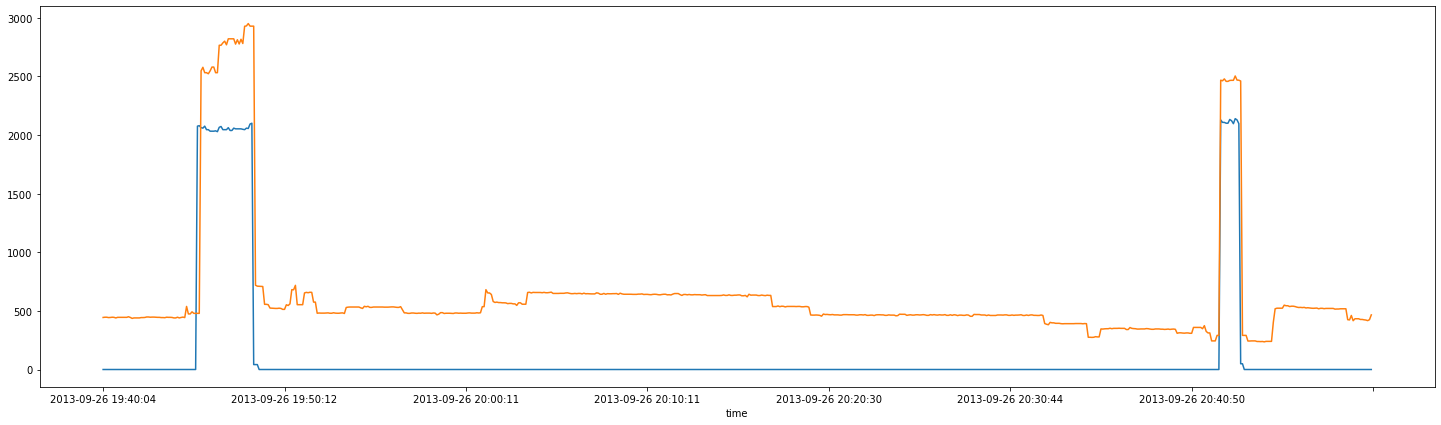

In [8]:
original['kettle']['2013-09-26 19:40': '2013-09-26 20:51'].plot(figsize=(25,7))
original['aggregate']['2013-09-26 19:40': '2013-09-26 20:51'].plot(figsize=(25,7))
# kettle.data[3]['kettle']['2013-09-26 19:40': '2013-09-26 20:51'].plot(figsize=(25,7))

<AxesSubplot:xlabel='time'>

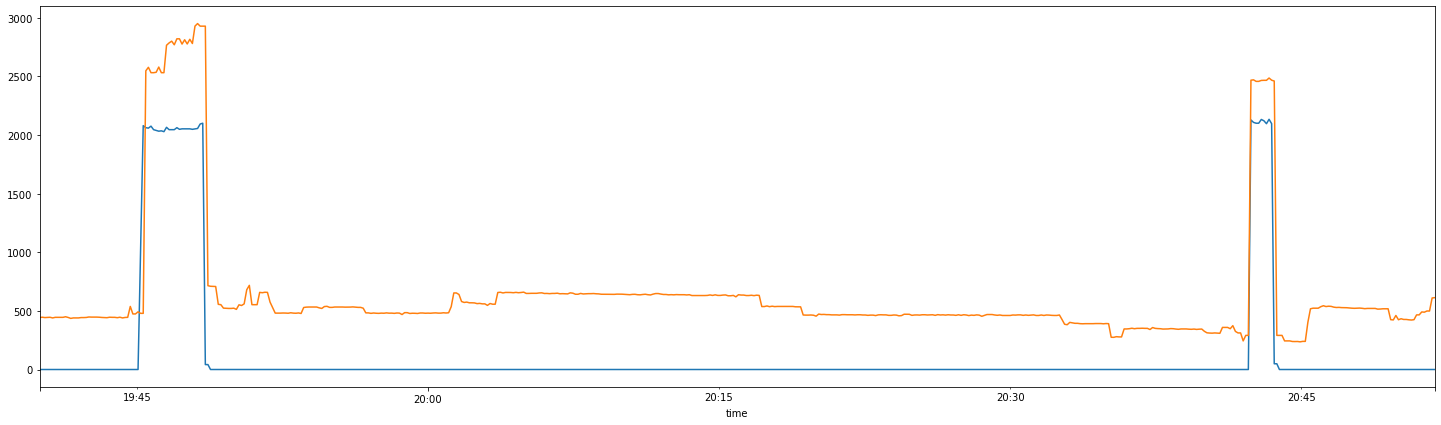

In [9]:
kettle.data[3]['kettle']['2013-09-26 19:40': '2013-09-26 20:51'].plot(figsize=(25,7))
kettle.data[3]['aggregate']['2013-09-26 19:40': '2013-09-26 20:51'].plot(figsize=(25,7))